<div class="alert alert-warning"></i><strong><h1>CFT Data Science With R: Tutorials</h1></strong><br>By: Seiya David
<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="CFT.png" width="300px" style="display: inline-block; margin: 5px;">
<img src="images.jpg" width="150px" class="pull-right" style="display: inline-block; margin: 0px;">
</div>

<div class="alert alert-success"></i><strong><center><h1>K-Nearest Neighbors (KNN)</h1></center></strong>
 </div>

KNN is a process to classify unlabeled (or unseen)  data points by assigning them the class of the most similar labeled data points.

K-Nearest Neighbors or KNN algorithms is a supervised algorithms, it's simple to understand from an implementation point of view and is used for both **classification** as well as **Regression** problems.

Since KNN is a supervised learning algorithm, it begins with a training data set of observations which are **already** classified into different classes. The algorithm then picks each data point in the **unseen or out of sample** test data set and based upon a chosen **similarity measure**, identifies its $k$ nearest neighbors (where k is specified in advance). The data point is then assigned the class of the majority of the $k\,nearest\,neighbors$.

KNN is a non-parametric lazy learning method
> Non-parametric because it does not make any assumptions about data distribution

>It's simple, effective and has a fast training process

>K-NN is a lazy learner because it doesn’t learn a discriminative function from the training data but “memorizes” the training dataset instead.For example, the logistic regression algorithm learns its model weights (parameters) during training time. In contrast, there is no training time in K-NN

> KNN is slow in classification phase.

<div class="alert alert-success"></i><strong><h3>Distance Metrics or Similarity Measure</h3></strong>
 </div>

There are several distance metric used in knn for classifying how close a point we wish to predict/classify to it's neighbors. The predicted class is determined by what is called a ***majority vote*** based on our initial value of $k.$

Let's now see four of such Distance Metrics.
Supose we want to find the distance between two observations $i\,and\,j$<br>

#### Euclidean distance
$$Euclidean-distance(x_i, x_j) = \sqrt{\sum\limits_{m=1}^{n}({x_{im} - x_{jm}})^2}$$<br>, where $n$ is the number of features.

other widely used Distance Metrics include the Manhattan distance<br><br>
#### Manhattan distance
$$Manhattan\,distance(x_i, x_j) = \sum\limits_{m=1}^{n}|{x_{im} - x_{jm}}|$$<br><br>
#### Minkowski Metric
$$Minkowski\,metric(x_i, x_j) = (\sum\limits_{m=1}^{n}(|{x_{im} - x_{jm}}|)^q)^{1 \over q}$$<br>

#### Canberra metric
$$Canberra\, metric(x_i, x_j) = \sum\limits_{m=1}^{n} {|{x_{im} - x_{jm}}| \over |{x_{im}| - |x_{jm}}|}$$

The Euclidean distance and the Manhattan distance are special case of Minkowski Metric.<br>
The Euclidean distance is derived from the setting q = 2 and the Manhattan distance for the parameter value q = 1.

<div class="alert alert-success"></i><strong><h3>The Building process</h3></strong>
</div>

The traditional way of predicting the a class with K-Nearest Neighbors happens in five steps:
> **Step 1.**<br>
Normalize all the features and convert binary and ordered categorical variables to numeric.The rationale for this step is that the distance formula is highly dependent on how features are measured.

>The Euclidean distance formula is not defined for nominal data. Therefore, to calculate the distance between nominal features(i.e, is a categorical variable with two or more categories without having any kind of natural order.) we need to convert them into  a numeric format. A typical solution utilizes dummy coding, where a value of  1 indicates one category, and 0, the other

>If a nominal feature is ordinal (one could make such an argument for temperature), an alternative to dummy coding is to number the categories and apply normalization. For instance, cold, warm, and hot could be numbered as 1, 2, and 3, which normalizes to 0, 0.5, and 1. A caveat to this approach is that it should only be used if the steps between the categories are equivalent. For instance, although income categories for poor, middle class, and wealthy are ordered, the difference between the poor and middle class may be different than the difference between the middle class and wealthy. Since the steps between groups are not equal, dummy coding is a safer approach.<br>



> **Step 2.**<br>
Calculate/compute the distance matrix.

> **Step 3.**<br>
Select a value of k (set intial value of k = square root of the number of training instances).

> **Step 4.**<br>
Find k data points that are nearest neighbors.

> **Step 5.**<br>
predict based on the majority class of neighbors.

<div class="alert alert-info"><i class="icon-lightbulb"></i><strong>How K-Nearest Neighbors actually works [Class demonstration with a use case]</strong>
</div>

<div class="alert alert-danger"></i><i class="icon-attention-alt"></i>

    
| Ingredient | Sweetness | Crunchiness |Food type |
|:-----------|------------:|:------------:|:------------:|
| Nuts       |        3 |     5     |         Protein     |
| Apple     |      7 |    3    |        Fruit      | 
| Grape       |        8 |     5     |       Fruit       |
| Green bean         |         3 |      7      |     Vegetable         |
| Carrot       |       3 |    6    |      Vegetable        |

</div>

<div class="alert alert-success"></i><strong><h3>1.0 Read in the Data</h3></strong><br>

**About the dataset**<br>
The dataset has data derived from real and fake banknotes. Four different features are derived by processing the image of each banknote. The fifth column of the dataset contains the class label of 0 or 1 indicating whether the note is fake or real. Our goal is to build a classifier that can learn the model of a real banknote and then predict the class for a new banknote. The dataset contains 1,372 records.

In [27]:
# Import the bank notes data
bcw<- read.table("breast-cancer-wisconsin.csv", sep=",", header=T)

In [28]:
# View the first few observation of the imported data
head(bcw)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284


In [29]:
library(dplyr)
bcw_v2 <- select(bcw, -id)
head(bcw_v2)

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284


In [30]:
# View the first few observation of the labeled data to 
# verify names are added
head(bcw_v2)

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284


At the moment, the diagnosis field does not hold very meaningful names other than B and M. lets change these to the actual words they represent with the code below.

In [31]:
bcw_v2$diagnosis<- ifelse(grepl('B', bcw_v2$diagnosis),'Benign',
                     ifelse(grepl('M',bcw_v2$diagnosis),'Malignant',
                     'Nothing'))

In [32]:
# Let's view the bcw_v2 object to ensure the above code worked.
head(bcw_v2)

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
Benign,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
Benign,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
Benign,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
Benign,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
Benign,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
Benign,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284


<div class="alert alert-success"></i><strong><h3>1.1 Exploratory Data Analysis</h3></strong><br>

In [33]:
# Run the summary function
# we see that there is a need for normalization as some of the data ranges are very big
# Also we see that the class label(class) is not categorical, we would need to conver this
# as it's a classification problem
summary(bcw_v2)

  diagnosis          radius_mean      texture_mean   perimeter_mean  
 Length:569         Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Class :character   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Mode  :character   Median :13.370   Median :18.84   Median : 86.24  
                    Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                    3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                    Max.   :28.110   Max.   :39.28   Max.   :188.50  
   area_mean      smoothness_mean   compactness_mean  concavity_mean   
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
  poin

In [34]:
sum(is.na(bcw_v2))

[1] 0

In [35]:
missing = function(x){
      sum(is.na(x))
    }

In [36]:
apply(bcw_v2, 2, missing)

diagnosis       radius_mean      texture_mean    perimeter_mean 
                0                 0                 0                 0 
        area_mean   smoothness_mean  compactness_mean    concavity_mean 
                0                 0                 0                 0 
      points_mean     symmetry_mean    dimension_mean         radius_se 
                0                 0                 0                 0 
       texture_se      perimeter_se           area_se     smoothness_se 
                0                 0                 0                 0 
   compactness_se      concavity_se         points_se       symmetry_se 
                0                 0                 0                 0 
     dimension_se      radius_worst     texture_worst   perimeter_worst 
                0                 0                 0                 0 
       area_worst  smoothness_worst compactness_worst   concavity_worst 
                0                 0                 0                 0 
     points_worst    symmetry_worst   dimension_worst 
                0                 0                 0

In [37]:
# View the structure of the data
str(bcw_v2)

'data.frame':	569 obs. of  31 variables:
 $ diagnosis        : chr  "Benign" "Benign" "Benign" "Benign" ...
 $ radius_mean      : num  12.3 10.6 11 11.3 15.2 ...
 $ texture_mean     : num  12.4 18.9 16.8 13.4 13.2 ...
 $ perimeter_mean   : num  78.8 69.3 70.9 73 97.7 ...
 $ area_mean        : num  464 346 373 385 712 ...
 $ smoothness_mean  : num  0.1028 0.0969 0.1077 0.1164 0.0796 ...
 $ compactness_mean : num  0.0698 0.1147 0.078 0.1136 0.0693 ...
 $ concavity_mean   : num  0.0399 0.0639 0.0305 0.0464 0.0339 ...
 $ points_mean      : num  0.037 0.0264 0.0248 0.048 0.0266 ...
 $ symmetry_mean    : num  0.196 0.192 0.171 0.177 0.172 ...
 $ dimension_mean   : num  0.0595 0.0649 0.0634 0.0607 0.0554 ...
 $ radius_se        : num  0.236 0.451 0.197 0.338 0.178 ...
 $ texture_se       : num  0.666 1.197 1.387 1.343 0.412 ...
 $ perimeter_se     : num  1.67 3.43 1.34 1.85 1.34 ...
 $ area_se          : num  17.4 27.1 13.5 26.3 17.7 ...
 $ smoothness_se    : num  0.00805 0.00747 0.00516 0.01

<div class="alert alert-danger"></i><i class="icon-attention-alt"></i><strong>Normalize all the numerical features and convert binary variables</strong><br>
Normalization is the process of transforming a feature such that all of its values fall in a range between 0 and 1.
 </div>

In [15]:
# Let us write a simple numalize function
normalize <- function(x){
     numerator <- x - min(x) 
     denorminator <-  max(x) - min(x)
     return (numerator/denorminator) 
}

In [16]:
# Apply the normalized function using the the lapply function to the dataset, excluding the
# the class variable which is in the 5th column of the dataset
normalized_bcw_v2 <- lapply(bcw_v2[, -1], normalize)

In [38]:
normalized_bcw_v2 <- scale(bcw_v2[, -1])

In [39]:
# Join the normalized features to the class variable
normalized_bcw_v2 <- data.frame(diagnosis = bcw_v2[, 1], normalized_bcw_v2)

In [40]:
str(normalized_bcw_v2)

'data.frame':	569 obs. of  31 variables:
 $ diagnosis        : Factor w/ 2 levels "Benign","Malignant": 1 1 1 1 1 1 1 2 1 1 ...
 $ radius_mean      : num  -0.513 -1.001 -0.876 -0.808 0.302 ...
 $ texture_mean     : num  -1.604 -0.079 -0.572 -1.372 -1.414 ...
 $ perimeter_mean   : num  -0.54 -0.934 -0.866 -0.781 0.234 ...
 $ area_mean        : num  -0.542 -0.877 -0.8 -0.767 0.162 ...
 $ smoothness_mean  : num  0.458 0.037 0.806 1.425 -1.19 ...
 $ compactness_mean : num  -0.654 0.196 -0.498 0.175 -0.663 ...
 $ concavity_mean   : num  -0.614 -0.313 -0.732 -0.532 -0.688 ...
 $ points_mean      : num  -0.3072 -0.5798 -0.6216 -0.0247 -0.576 ...
 $ symmetry_mean    : num  0.538 0.403 -0.356 -0.148 -0.331 ...
 $ dimension_mean   : num  -0.46 0.2992 0.0853 -0.2943 -1.0421 ...
 $ radius_se        : num  -0.61 0.163 -0.752 -0.241 -0.818 ...
 $ texture_se       : num  -0.999 -0.036 0.308 0.229 -1.458 ...
 $ perimeter_se     : num  -0.592 0.279 -0.754 -0.502 -0.756 ...
 $ area_se          : num  -0

In [41]:
str(normalized_bcw_v2)

'data.frame':	569 obs. of  31 variables:
 $ diagnosis        : Factor w/ 2 levels "Benign","Malignant": 1 1 1 1 1 1 1 2 1 1 ...
 $ radius_mean      : num  -0.513 -1.001 -0.876 -0.808 0.302 ...
 $ texture_mean     : num  -1.604 -0.079 -0.572 -1.372 -1.414 ...
 $ perimeter_mean   : num  -0.54 -0.934 -0.866 -0.781 0.234 ...
 $ area_mean        : num  -0.542 -0.877 -0.8 -0.767 0.162 ...
 $ smoothness_mean  : num  0.458 0.037 0.806 1.425 -1.19 ...
 $ compactness_mean : num  -0.654 0.196 -0.498 0.175 -0.663 ...
 $ concavity_mean   : num  -0.614 -0.313 -0.732 -0.532 -0.688 ...
 $ points_mean      : num  -0.3072 -0.5798 -0.6216 -0.0247 -0.576 ...
 $ symmetry_mean    : num  0.538 0.403 -0.356 -0.148 -0.331 ...
 $ dimension_mean   : num  -0.46 0.2992 0.0853 -0.2943 -1.0421 ...
 $ radius_se        : num  -0.61 0.163 -0.752 -0.241 -0.818 ...
 $ texture_se       : num  -0.999 -0.036 0.308 0.229 -1.458 ...
 $ perimeter_se     : num  -0.592 0.279 -0.754 -0.502 -0.756 ...
 $ area_se          : num  -0

In [42]:
# view the structure. We see that all the features are in shape of the knn build process
summary(normalized_bcw_v2)

     diagnosis    radius_mean       texture_mean     perimeter_mean   
 Benign   :357   Min.   :-2.0279   Min.   :-2.2273   Min.   :-1.9828  
 Malignant:212   1st Qu.:-0.6888   1st Qu.:-0.7253   1st Qu.:-0.6913  
                 Median :-0.2149   Median :-0.1045   Median :-0.2358  
                 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
                 3rd Qu.: 0.4690   3rd Qu.: 0.5837   3rd Qu.: 0.4992  
                 Max.   : 3.9678   Max.   : 4.6478   Max.   : 3.9726  
   area_mean       smoothness_mean    compactness_mean  concavity_mean   
 Min.   :-1.4532   Min.   :-3.10935   Min.   :-1.6087   Min.   :-1.1139  
 1st Qu.:-0.6666   1st Qu.:-0.71034   1st Qu.:-0.7464   1st Qu.:-0.7431  
 Median :-0.2949   Median :-0.03486   Median :-0.2217   Median :-0.3419  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3632   3rd Qu.: 0.63564   3rd Qu.: 0.4934   3rd Qu.: 0.5256  
 Max.   : 5.2459   Max.   : 4.76672   Max.   : 4.5644   Max

<div class="alert alert-success"></i><strong><h3>1.2 Training and Testing Data Split</h3></strong><br>

In [43]:
library(caret, verbose = FALSE, quietly = T)
set.seed(100)

train_rows <- createDataPartition(normalized_bcw_v2$diagnosis, p=0.7, list=F)
normalized_bcw_v2_train <- normalized_bcw_v2[train_rows, ]
normalized_bcw_v2_test <- normalized_bcw_v2[-train_rows, ]

<div class="alert alert-success"></i><strong><h3>1.3 Train the Model</h3></strong><br>

In [64]:
library(class)  # for the knn function

bcw_v2_knn <- knn(normalized_bcw_v2_train[, -1], 
                          normalized_bcw_v2_test[, -1], normalized_bcw_v2_train[, 1], k=4)

In [65]:
# check the accuracy
table(bcw_v2_knn,normalized_bcw_v2_test$diagnosis)

           
bcw_v2_knn  Benign Malignant
  Benign       106         5
  Malignant      1        58

<div class="alert alert-success"></i><strong><h3>1.4 Model validation</h3></strong><br>

In [55]:
library(e1071, verbose = FALSE, quietly = T)
# check the accuracy (a package called caret need to be installed to use the 
# confusinMatrix function below)
confusionMatrix(table(bcw_v2_knn, normalized_bcw_v2_test$diagnosis), positive="Malignant")

Confusion Matrix and Statistics

           
bcw_v2_knn  Benign Malignant
  Benign       106         5
  Malignant      1        58
                                          
               Accuracy : 0.9647          
                 95% CI : (0.9248, 0.9869)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9233          
 Mcnemar's Test P-Value : 0.2207          
                                          
            Sensitivity : 0.9206          
            Specificity : 0.9907          
         Pos Pred Value : 0.9831          
         Neg Pred Value : 0.9550          
             Prevalence : 0.3706          
         Detection Rate : 0.3412          
   Detection Prevalence : 0.3471          
      Balanced Accuracy : 0.9556          
                                          
       'Positive' Class : Malignant       
                                          

<div class="alert alert-info"><i class="icon-lightbulb"></i>
Earlier we choose a $k$ value of 37, Is this the value that would give the best accuracy?<br><br>
Let's apply an automation technique to obtain the best $k$ value
</div>

<div class="alert alert-success"></i><strong><h3>1.5 Hyper parameters tuning</h3></strong><br>

In [49]:
# let us set a series of k values to choose the k value with the highest accuracy
tunegrid <- expand.grid(.k = seq(2,24, by=1)) 

# Set the train control as cross validation
control <- trainControl(method="cv")

# Use this code for reproducibility
set.seed(102)

In [30]:
seq(2,38, by=2)

[1]  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38

In [50]:
# Build the train model
knn.train <- train(diagnosis ~., data = normalized_bcw_v2_train, method="knn", 
                   trControl=control, tuneGrid=tunegrid) 

In [51]:
# summary
knn.train

k-Nearest Neighbors 

399 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 359, 359, 359, 359, 359, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.9473718  0.8881908
   3  0.9624359  0.9185080
   4  0.9649359  0.9240513
   5  0.9524359  0.8967422
   6  0.9574359  0.9071127
   7  0.9524359  0.8961538
   8  0.9574359  0.9072608
   9  0.9549359  0.9016932
  10  0.9499359  0.8911789
  11  0.9550000  0.9021045
  12  0.9549359  0.9012630
  13  0.9549359  0.9017073
  14  0.9550000  0.9016602
  15  0.9524359  0.8959998
  16  0.9524359  0.8961538
  17  0.9549359  0.9012630
  18  0.9549359  0.9012630
  19  0.9549359  0.9012630
  20  0.9575000  0.9069234
  21  0.9575000  0.9069234
  22  0.9549359  0.9012630
  23  0.9549359  0.9012630
  24  0.9549359  0.9012630

Accuracy was used to select the optimal model using the largest value.
The final value used for the mod

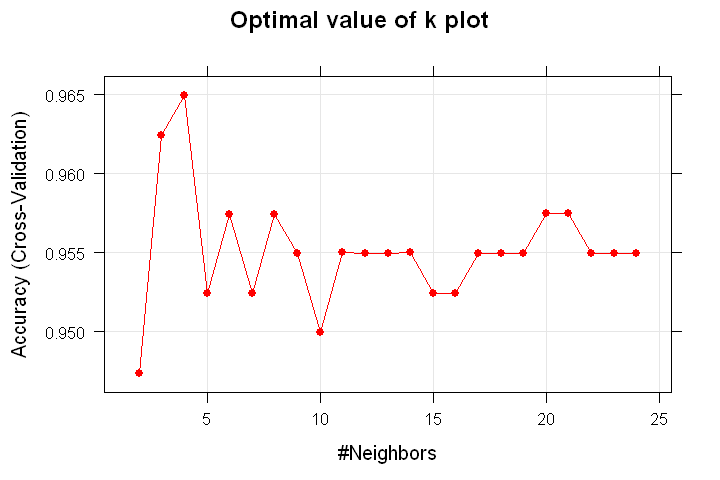

In [52]:
# plot the model to see the optimal value of k with high accuracy
options(repr.plot.width=6, repr.plot.height=4)
plot(knn.train, main = "Optimal value of k plot", col = 'red', pch=19)

#### haven gotten our $k$, let us re-build the process again

<div class="alert alert-success"></i><strong><h3>1.6 Re-Train the Model [Part 2]</h3></strong><br>

<div class="alert alert-danger"></i><i class="icon-attention-alt"></i>
As a rule, always choose an odd number for k, so there will always be a winner in the voting process of the algorithm. Though k = 10 was detected by our model, we go with 9, since its close to 10, its odd and does have high accuracy as well.
 </div>

In [35]:
# let us rebuild the model with with the optimal k value
fake_bank_note_knn <- knn(fake_bank_note_train[, -5], fake_bank_note_test[, -5], 
                          fake_bank_note_train[, 5], k=9)

<div class="alert alert-success"></i><strong><h3>1.7 Model Re-validation [Part 2]</h3></strong><br>

In [36]:
# Evaluate the model
confusionMatrix(table(fake_bank_note_knn, fake_bank_note_test$class))

Confusion Matrix and Statistics

                  
fake_bank_note_knn   0   1
                 0 228   0
                 1   0 183
                                     
               Accuracy : 1          
                 95% CI : (0.9911, 1)
    No Information Rate : 0.5547     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5547     
         Detection Rate : 0.5547     
   Detection Prevalence : 0.5547     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [ ]:
# Predict out of sample data
test_data_pred <- predict(knn.train, newdata = fake_bank_note_test[, -5])
test_data_pred

In [ ]:
# put in a data frame.
compare_data <- data.frame(fake_bank_note_test,test_data_pred)
head(compare_data)

<div class="alert alert-danger"></i><strong><center><h1>Class Project</h1></center></strong>

You have just got a Data Scientist role at the NHS and have been tasked to develop a process to screen assist clinician/Doctors
diagnosed breast cancer symptoms in patients so as to start treatment prior to it causing noticeable symptoms.<br><br>

You have been provided with a data file "breast-cancer-wisconsin.csv" for this project. Use ONLY K-Nearest Neighbors (KNN) for this task.</div>

<div class="alert alert-success"></i><strong>Solution Steps:</strong>
    <ul>
        <li>Read in the Data</li>
        <li>Exploratory Data Analysis</li>
        <li>Train the Model</li>
        <li>Model validation</li>
        <li>Hyper parameters tuning</li>
    </ul>
</div>

# End